# 1. Data pre-processing - Understand the data and treat missing values, outliers (8 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name=1, na_values = ["inf","missing"]).rename(columns=lambda x: x.strip())

In [3]:
df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [6]:
df.columns[df.isnull().any()]

Index(['Family members'], dtype='object')

In [7]:
df[df.columns[df.isnull().any()]].isnull().sum()

Family members    18
dtype: int64

In [8]:
# replacing missing values of family members with median values
df['Family members'] = df['Family members'].fillna(df['Family members'].median()).astype(int)

In [9]:
df.dtypes

ID                         int64
Age (in years)             int64
Experience (in years)      int64
Income (in K/month)        int64
ZIP Code                   int64
Family members             int64
CCAvg                    float64
Education                  int64
Mortgage                   int64
Personal Loan              int64
Securities Account         int64
CD Account                 int64
Online                     int64
CreditCard                 int64
dtype: object

In [10]:
# dropping columns ID and ZIP code
df01 = df.drop('ID',axis=1)
df01 = df01.drop('ZIP Code',axis=1)
df01.head()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df01.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (in years),5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family members,5000.0,2.395800,1.145340,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Looking at the above data
- Income and Mortgage columns may have outliers seeing the description

In [12]:
import matplotlib.pyplot as plt

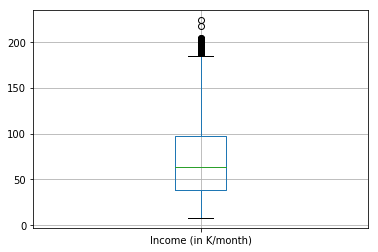

In [13]:
df01[['Income (in K/month)']].boxplot()

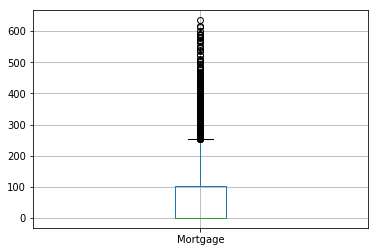

In [14]:
df01[['Mortgage']].boxplot()

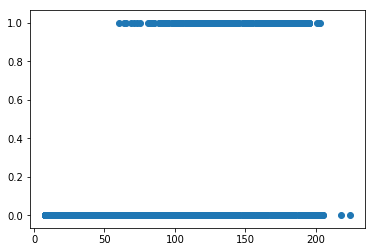

In [15]:
plt.scatter(df01['Income (in K/month)'],df01['Personal Loan'])
plt.show()

#### Observation
- Outliers for Income (in K/month) and Mortgageshould be removed

In [16]:
q3 = df01[['Income (in K/month)']].quantile(0.75)['Income (in K/month)']
q1 = df01[['Income (in K/month)']].quantile(0.25)['Income (in K/month)']
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print(outliers_above,outliers_below)

157.0 -20.0


In [17]:
q3 = df01[['Mortgage']].quantile(0.75)['Mortgage']
q1 = df01[['Mortgage']].quantile(0.25)['Mortgage']
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print(outliers_above,outliers_below)

202.0 -101.0


# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (4 points)

In [18]:
import seaborn as sns

In [19]:
corr=df01[['Age (in years)','Experience (in years)','Income (in K/month)','Family members',\
                 'CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']].corr()
corr

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age (in years),1.000000,0.994215,-0.055269,-0.045430,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience (in years),0.994215,1.000000,-0.046574,-0.051584,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income (in K/month),-0.055269,-0.046574,1.000000,-0.157364,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family members,-0.045430,-0.051584,-0.157364,1.000000,-0.110314,0.063115,-0.020221,0.061069,0.021356,0.013539,0.009232,0.009650
CCAvg,-0.052012,-0.050077,0.645984,-0.110314,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.063115,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020221,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061069,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.021356,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.013539,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


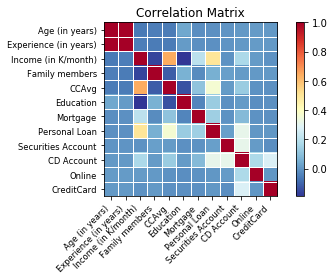

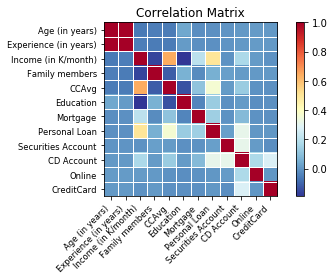

In [20]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr,xnames=list(corr.columns))

#### Observation
- There is a high correlation between CCAvg spend and Income.
- There is a high correlation between Age and Experience.

/Users/vymo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vymo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


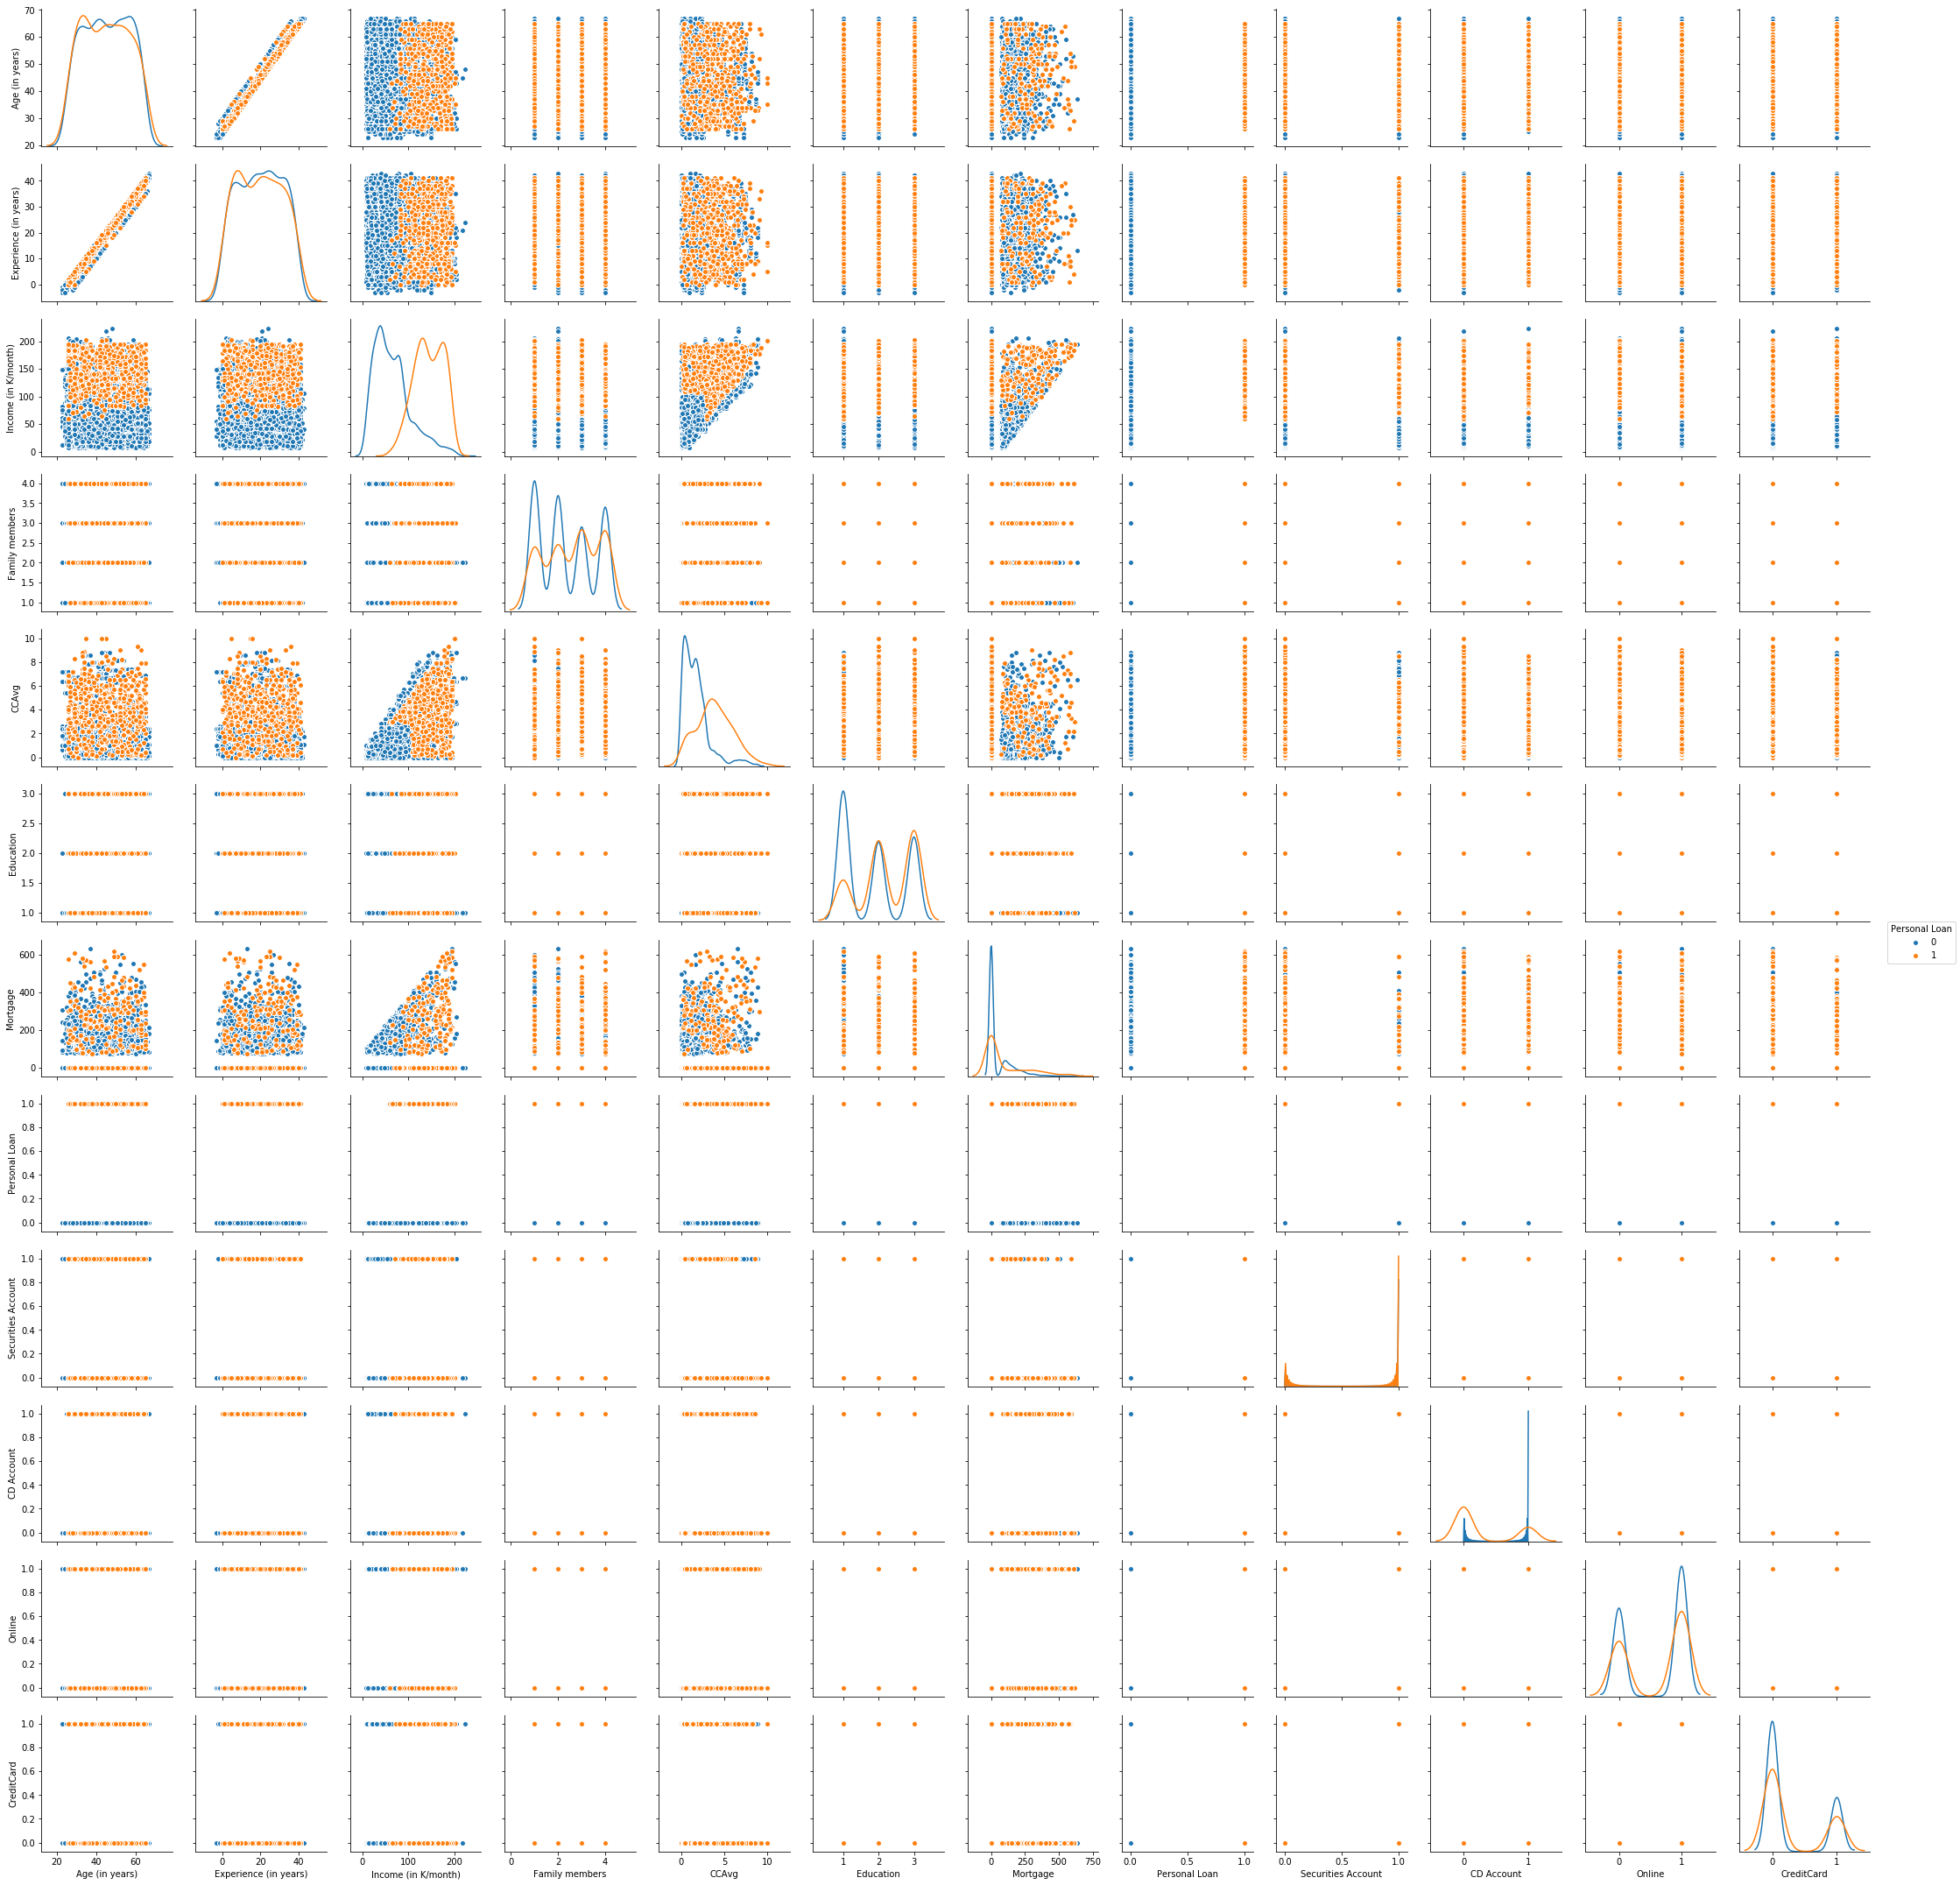

In [21]:
sns.pairplot(df01 , hue='Personal Loan' , diag_kind = 'kde')

In [22]:
# one-hot coding for categorical columns
df02 =  pd.get_dummies(df01,columns=['Education','Securities Account','CD Account','Online','CreditCard'],drop_first=True)

In [23]:
df02.head()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Mortgage,Personal Loan,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,4,1.6,0,0,0,0,1,0,0,0
1,45,19,34,3,1.5,0,0,0,0,1,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,1,0,0,0,0,0
4,35,8,45,4,1.0,0,0,1,0,0,0,0,1


In [24]:
df02.shape

(5000, 13)

In [26]:
X = df02.drop('Personal Loan',axis=1)
y = df02.pop('Personal Loan')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# 3. Model the data using Logistic regression (4 points)

In [28]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
model.score(X_test,y_test)

0.9553333333333334

# 4. Find the accuracy of the model using confusion matrix (4 points)

In [30]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
metrics.confusion_matrix(y_test, y_predict)

array([[1340,   11],
       [  56,   93]])

#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 93 times (True Positives)
- We correctly predicted that Users will not take personal loan 1340 times (True Negetives)
- Type I error was 11 Falsely predict positive (False Positives)
- Type II error was 51 Falsely predict negative (False Negatives)

In [32]:
model.score(X_test,y_test)

0.9553333333333334

In [33]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1351
          1       0.89      0.62      0.74       149

avg / total       0.95      0.96      0.95      1500



# 5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression (10 points)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [35]:
KNN.score(X_test,y_test)

0.9046666666666666

In [36]:
KNN_predict = KNN.predict(X_test)

In [37]:
metrics.confusion_matrix(y_test,KNN_predict)

array([[1307,   44],
       [  99,   50]])

#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 50 times (True Positives)
- We correctly predicted that Users will not take personal loan 1307 times (True Negetives)
- Type I error was 44 Falsely predict positive (False Positives)
- Type II error was 99 Falsely predict negative (False Negatives)

In [38]:
print(metrics.classification_report(y_test, KNN_predict))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1351
          1       0.53      0.34      0.41       149

avg / total       0.89      0.90      0.89      1500



In [39]:
# Using n_neighbors=7
KNN = KNeighborsClassifier(n_neighbors=7,weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [40]:
KNN.score(X_test,y_test)

0.9053333333333333

In [41]:
KNN_predict=KNN.predict(X_test)
metrics.confusion_matrix(y_test,KNN_predict)

array([[1309,   42],
       [ 100,   49]])

#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 49 times (True Positives)
- We correctly predicted that Users will not take personal loan 1309 times (True Negetives)
- Type I error was 42 Falsely predict positive (False Positives)
- Type II error was 100 Falsely predict negative (False Negatives)

In [42]:
print(metrics.classification_report(y_test, KNN_predict))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1351
          1       0.54      0.33      0.41       149

avg / total       0.89      0.91      0.89      1500



In [43]:
# Using n_neighbors=9
KNN = KNeighborsClassifier(n_neighbors=9,weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [44]:
KNN.score(X_test,y_test)

0.9086666666666666

In [45]:
KNN_predict=KNN.predict(X_test)
print(metrics.confusion_matrix(y_test,KNN_predict))

[[1316   35]
 [ 102   47]]


#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 47 times (True Positives)
- We correctly predicted that Users will not take personal loan 1316 times (True Negetives)
- Type I error was 35 Falsely predict positive (False Positives)
- Type II error was 102 Falsely predict negative (False Negatives)

In [46]:
print(metrics.classification_report(y_test, KNN_predict))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1351
          1       0.57      0.32      0.41       149

avg / total       0.89      0.91      0.90      1500



In [47]:
# Using n_neighbors=11
KNN = KNeighborsClassifier(n_neighbors=11,weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')

In [48]:
KNN.score(X_test,y_test)

0.9086666666666666

In [49]:
KNN_predict=KNN.predict(X_test)
metrics.confusion_matrix(y_test,KNN_predict)

array([[1317,   34],
       [ 103,   46]])

#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 46 times (True Positives)
- We correctly predicted that Users will not take personal loan 1317 times (True Negetives)
- Type I error was 34 Falsely predict positive (False Positives)
- Type II error was 103 Falsely predict negative (False Negatives)

In [50]:
print(metrics.classification_report(y_test, KNN_predict))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1351
          1       0.57      0.31      0.40       149

avg / total       0.89      0.91      0.90      1500



In [51]:
# Using Random Forest for the same
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=12,criterion='entropy',max_depth=9)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
RF.score(X_test,y_test)

0.9793333333333333

In [53]:
rf_predict = RF.predict(X_test)

In [54]:
metrics.confusion_matrix(y_test,rf_predict)

array([[1347,    4],
       [  27,  122]])

#### As per the confusion matrix

- We correctly predicted that Users will go for personal loan 125 times (True Positives)
- We correctly predicted that Users will not take personal loan 1350 times (True Negetives)
- Type I error was 1 Falsely predict positive (False Positives)
- Type II error was 24 Falsely predict negative (False Negatives)

In [55]:
print(metrics.classification_report(y_test, rf_predict))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1351
          1       0.97      0.82      0.89       149

avg / total       0.98      0.98      0.98      1500



#### Observations

- Random Forest model gave better results as compared to the any other model.
- The precision recall and f1-score too was way better than all other models at 0.98

In [56]:
from sklearn import tree
from os import system
from IPython.display import Image
dot_file = open('personal_loan.dot','w')
train_char_label = ['0', '1']
dot_data = tree.export_graphviz(RF.estimators_[0], out_file=dot_file, feature_names = list(X_train), class_names = list(train_char_label))
dot_file.close()

In [57]:
system("dot -Tpng  personal_loan.dot -o personal_loan.png")

0

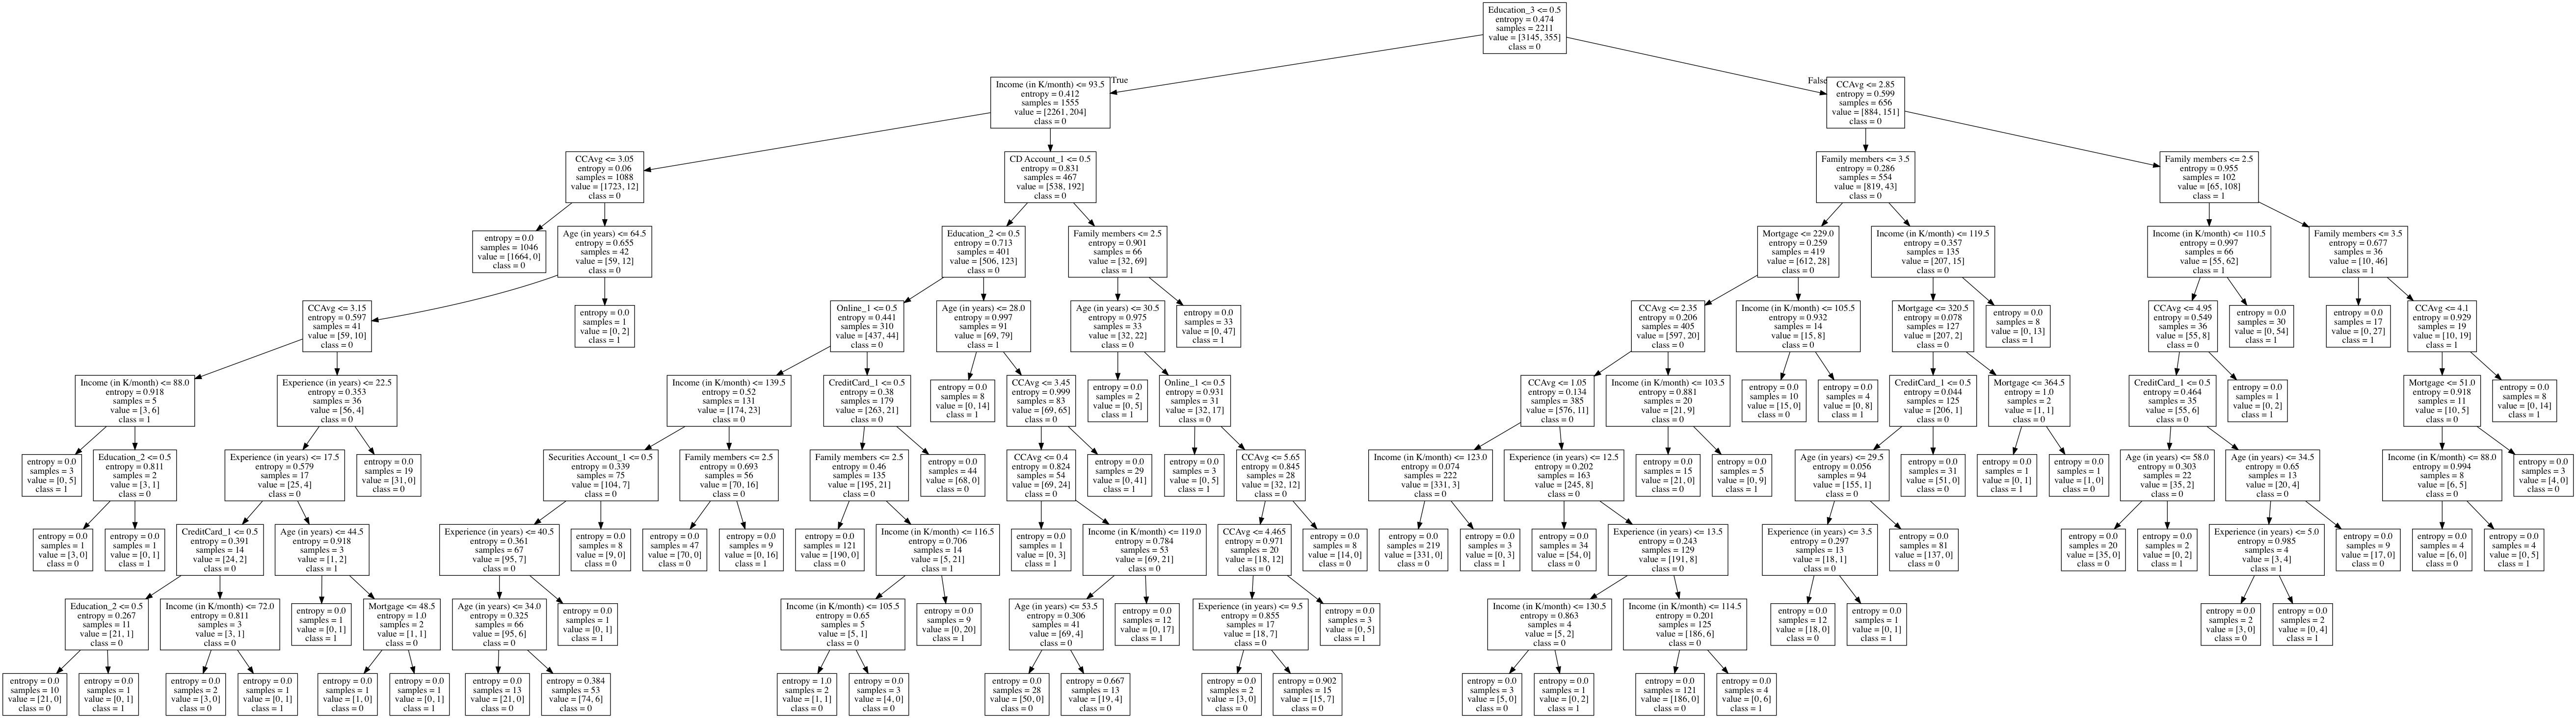

In [58]:
Image("personal_loan.png")